**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Exploración y Curación de Datos**

*Edición 2021*

----

# Trabajo práctico entregable - parte 1

En esta notebook, vamos a cargar el conjunto de datos de [la compentencia Kaggle](https://www.kaggle.com/dansbecker/melbourne-housing-snapshot) sobre estimación de precios de ventas de propiedades en Melbourne, Australia.

Utilizaremos el conjunto de datos reducido producido por [DanB](https://www.kaggle.com/dansbecker). Hemos subido una copia a un servidor de la Universidad Nacional de Córdoba para facilitar su acceso remoto.

In [130]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import seaborn as sns
sns.set_context('talk')

In [131]:
import plotly
plotly.__version__
# Make sure it's 4.14.3

'4.4.1'

In [132]:
# To update plotly, uncomment and run the following line:
# !pip install plotly --upgrade

In [133]:
melb_df = pd.read_csv(
    'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/melb_data.csv')
melb_df[:3]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0


## Ejercicio 1: 

1. Eliminar los valores extremos que no sean relevantes para la predicción de valores de las propiedades.

1. Investigar la distribución de las variables del conjunto de datos y seleccionar un subconjunto de columnas que les parezcan relevantes al problema de predicción del valor de la propiedad.
  1. Justificar cada columna no seleccionada.
  2. Para las variables categóricas seleccionadas, agrupe o combine las categorías poco frecuentes para asegurar que todos los grupos tengan un número mínimo de registros.

2. Agregar información adicional respectiva al entorno de una propiedad a partir del [conjunto de datos de AirBnB](https://www.kaggle.com/tylerx/melbourne-airbnb-open-data?select=cleansed_listings_dec18.csv) utilizado en el práctico. 
  1. Seleccionar qué variables agregar y qué combinaciones aplicar a cada una. Por ejemplo, pueden utilizar solo la columna `price`, o aplicar múltiples transformaciones como la mediana o el mínimo.
  1. Utilizar la variable zipcode para unir los conjuntos de datos. Sólo incluir los zipcodes que tengan una cantidad mínima de registros (a elección) como para que la información agregada sea relevante.
  2. Investigar al menos otras 2 variables que puedan servir para combinar los datos, y justificar si serían adecuadas o no. Pueden asumir que cuentan con la ayuda de anotadores expertos para encontrar equivalencias entre barrios o direcciones, o que cuentan con algoritmos para encontrar las n ubicaciones más cercanas a una propiedad a partir de sus coordenadas geográficas. **NO** es necesario que realicen la implementación.

Pueden leer otras columnas del conjunto de AirBnB además de las que están en `interesting_cols`, si les parecen relevantes.


### 1 y 2: Distribución de las variables y eliminación de valores extremos

In [134]:
melb_df.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

#### Room y Price

In [135]:
#veamos los valores de las numericas
melb_df['Rooms'].describe()

count    13580.000000
mean         2.937997
std          0.955748
min          1.000000
25%          2.000000
50%          3.000000
75%          3.000000
max         10.000000
Name: Rooms, dtype: float64

In [136]:
melb_df['Price'].describe().round(2)

count      13580.00
mean     1075684.08
std       639310.72
min        85000.00
25%       650000.00
50%       903000.00
75%      1330000.00
max      9000000.00
Name: Price, dtype: float64

In [137]:
#Veamos la distribucion de las piezas
print("Distribucion por cantidad de piezas")
print(melb_df.groupby("Rooms")["Suburb"].count())

Distribucion por cantidad de piezas
Rooms
1      681
2     3648
3     5881
4     2688
5      596
6       67
7       10
8        8
10       1
Name: Suburb, dtype: int64


Los valores extremos de 7-10 habitaciones pueden ser reales y no van a tener una incidencia importante en las medidas centrales

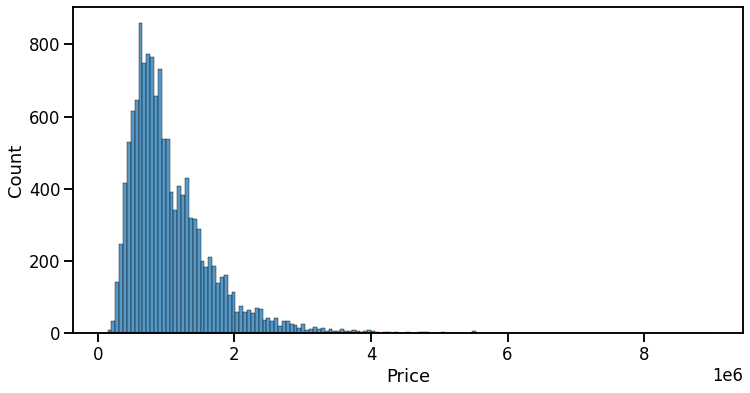

In [138]:
#Veamos la distribucion del precio
plt.figure(figsize = (12,6))
sns.histplot(melb_df,x="Price")
plt.show()

In [139]:
#Veamos algunos registros de mas de 4M

Qt= len(melb_df.loc[melb_df['Price']>4000000,:])
print(f"Las propiedades con un precio mayor a 4M son en total: {Qt} ")

Las propiedades con un precio mayor a 4M son en total: 55 


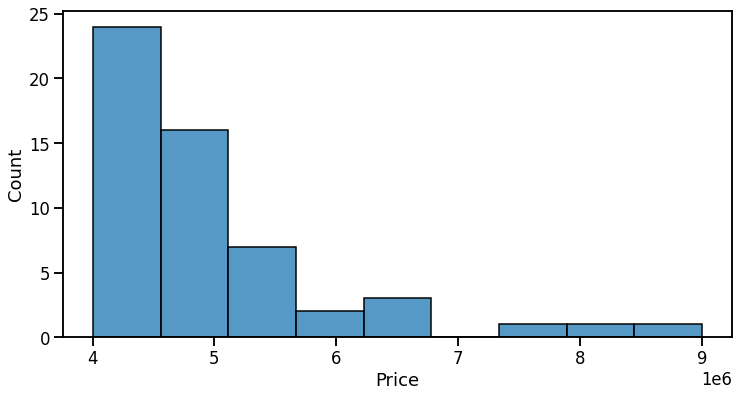

In [140]:
#Veamos la distribucion de estas casas de alto valor
Alto_Valor = melb_df.loc[melb_df['Price']>4000000,:]
plt.figure(figsize = (12,6))
sns.histplot(Alto_Valor,x="Price")
plt.show()

In [141]:
#Veamos los casos de mas de 7M
melb_df.loc[melb_df['Price']>7000000,:]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
7692,Canterbury,49 Mangarra Rd,5,h,8000000.0,VB,Sotheby's,13/05/2017,9.0,3126.0,5.0,5.0,4.0,2079.0,464.3,1880.0,Boroondara,-37.81790,145.06940,Southern Metropolitan,3265.0
9575,Hawthorn,49 Lisson Gr,4,h,7650000.0,S,Abercromby's,17/06/2017,5.3,3122.0,4.0,2.0,4.0,1690.0,284.0,1863.0,Boroondara,-37.82652,145.03052,Southern Metropolitan,11308.0
12094,Mulgrave,35 Bevis St,3,h,9000000.0,PI,Hall,29/07/2017,18.8,3170.0,3.0,1.0,1.0,744.0,117.0,1960.0,Monash,-37.93168,145.16126,South-Eastern Metropolitan,7113.0


Calculemos la media de landsize para ver si son terrenos grandes y podemos corroborar que se trata de propiedades de alto valor, varias habitaciones y grandes dimsnsiones de terrneo.

In [142]:
melb_df["Landsize"].mean()

558.4161266568483

#### Suburb, Address y Type

In [143]:
#Veamos los valores distintos para la tres variables

print(melb_df.loc[:, ['Suburb','Address','Type']].describe())


           Suburb           Address   Type
count       13580             13580  13580
unique        314             13378      3
top     Reservoir  1/1 Clarendon St      h
freq          359                 3   9449


Adress no va a ser una variable para anlizar ya que tiene demasiados valores y por lo tanto no aporta informacion

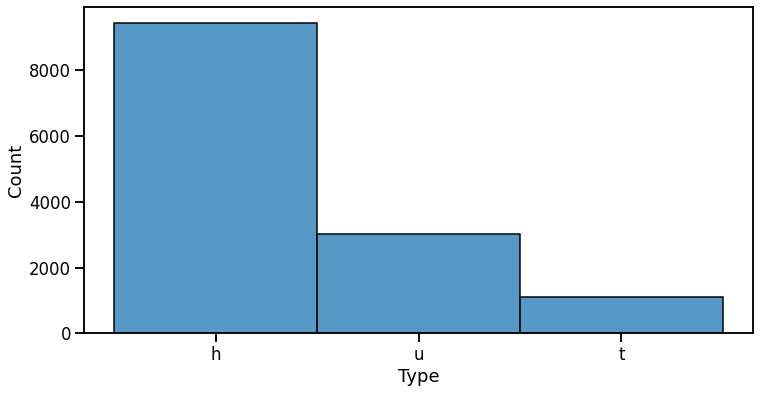

In [144]:
#Veamos la distribucion de type

plt.figure(figsize = (12,6))
sns.histplot(melb_df,x="Type")
plt.show()

In [145]:
#veamos los precios por type
print(melb_df.groupby("Type")["Price"].mean().round())


Type
h    1242665.0
t     933735.0
u     605127.0
Name: Price, dtype: float64


Type parece ser una columna importante, la vamos a dejar

In [146]:
#Veamos que relación hay entre Suburb y CouncilArea

print(melb_df.loc[:, ['Suburb','CouncilArea']].describe())

           Suburb CouncilArea
count       13580       12211
unique        314          33
top     Reservoir    Moreland
freq          359        1163


Parece ser que suburb hace referencia a una unidad de menor jerarquia que Council Area, con lo cual lo dejamos. Además, no tiene datos Nan, en cambio CouncilArea sí.

#### Latitude - Longitude

In [147]:
# import plotly.express as px

# fig = px.scatter_geo(melb_df,
#                     lat=melb_df.Lattitude,
#                     lon=melb_df.Longtitude,
#                     )
# fig.show()

Todos los puntos parecen caer en el área de Melbourne. Por las dudas vemos valores extremos

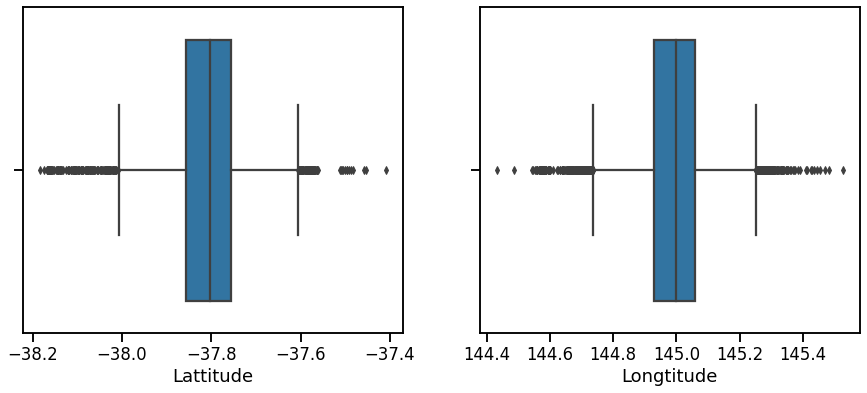

In [148]:
plt.figure(figsize = (15,6))
plt.subplot(1,2,1)
sns.boxplot(data = melb_df, x = "Lattitude")
plt.subplot(1,2,2)
sns.boxplot(data = melb_df, x = "Longtitude")

#### Regionname

In [149]:
#veamos los precios por type
print(melb_df.groupby("Regionname")["Price"].mean().round())

Regionname
Eastern Metropolitan          1104080.0
Eastern Victoria               699981.0
Northern Metropolitan          898171.0
Northern Victoria              594829.0
South-Eastern Metropolitan     922944.0
Southern Metropolitan         1372963.0
Western Metropolitan           866421.0
Western Victoria               397523.0
Name: Price, dtype: float64


In [150]:
#veamos los precios por type
print(melb_df.groupby("Regionname")["Price"].std().round())

Regionname
Eastern Metropolitan          467418.0
Eastern Victoria              165498.0
Northern Metropolitan         443968.0
Northern Victoria             217762.0
South-Eastern Metropolitan    506525.0
Southern Metropolitan         822529.0
Western Metropolitan          394145.0
Western Victoria               86212.0
Name: Price, dtype: float64


Vemos demasiada variabilidad dentro de cada Region, quizá sea mejor descartarla y quedarse con CouncilArea que tiene más granularidad.

```
# Esto tiene formato de código
```



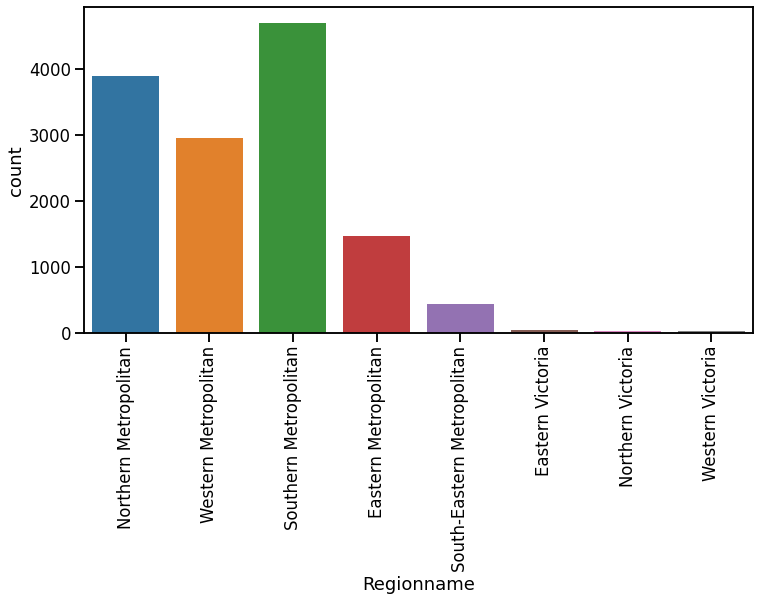

In [151]:
plt.figure(figsize=(12,6))
sns.countplot(data = melb_df, x="Regionname")
plt.xticks(rotation=90)
plt.show()

Agrupamos Eastern, Northern y Western Victoria en una sola categoria, asi no quedan tan chicos

'Eastern Victoria','Northern Victoria','Western Victoria','Regionname_group']

In [152]:
### Pareceria estar aca el inconvenitente
melb_df['Regionname_group'] = melb_df['Regionname']

melb_df.loc[melb_df.Regionname =='Eastern Victoria','Regionname_group']= 'Victoria'
melb_df.loc[melb_df.Regionname =='Western Victoria','Regionname_group']= 'Victoria'
melb_df.loc[melb_df.Regionname =='Northern Victoria','Regionname_group']= 'Victoria'

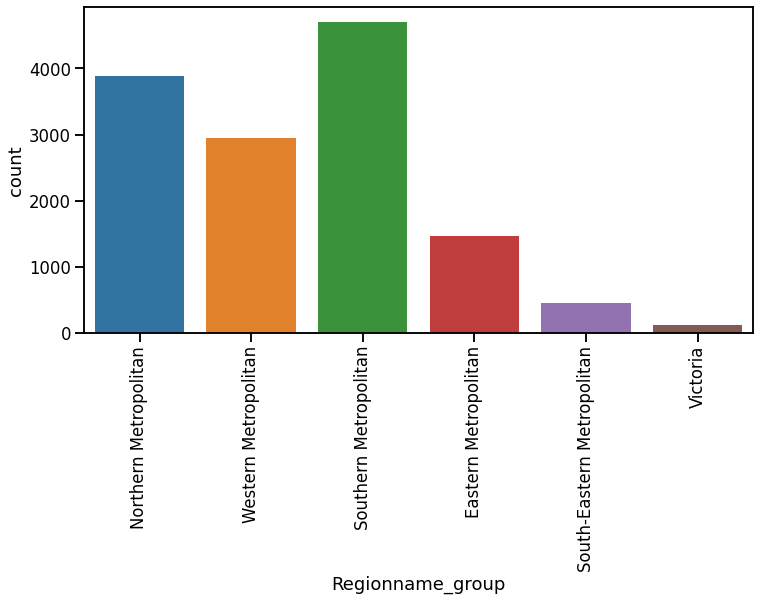

In [153]:
plt.figure(figsize=(12,6))
sns.countplot(data = melb_df, x="Regionname_group")
plt.xticks(rotation=90)
plt.show()

In [154]:
melb_df.Method.unique()

array(['S', 'SP', 'PI', 'VB', 'SA'], dtype=object)

#### CouncilArea

In [155]:
missing_values_count = melb_df['CouncilArea'].isna().sum()
missing_values_count

1369

Council Area tiene 1369 datos faltantes

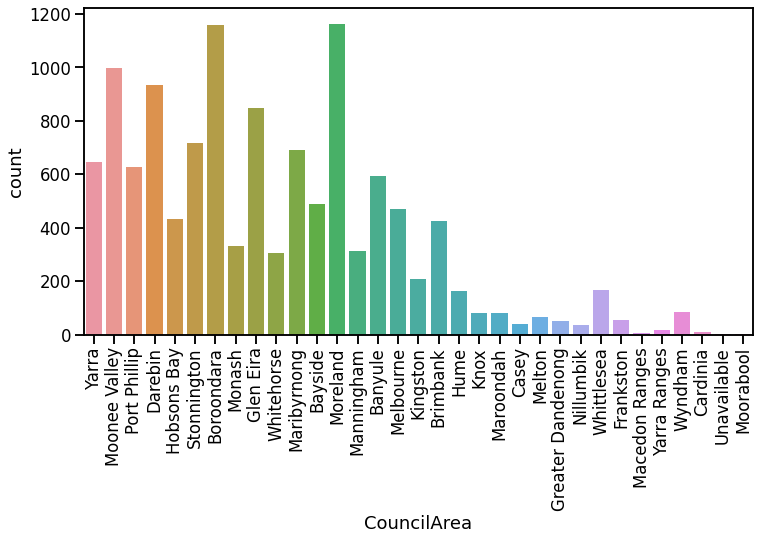

In [156]:

plt.figure(figsize=(12,6))
sns.countplot(data = melb_df, x="CouncilArea")
plt.xticks(rotation=90)
plt.show()

Aplicamos el agrupamiento de RegionName y la cantidad de registros

In [157]:
melb_df['CouncilArea_group'] = melb_df['CouncilArea']
melb_df.loc[melb_df.Regionname_group =='Victoria','CouncilArea_group']= 'Others - Victoria'
melb_df['CouncilArea_count'] = melb_df.groupby('CouncilArea')['CouncilArea'].transform('count')

In [158]:
#Umbral para hacer el corte en count

melb_df.CouncilArea_count.describe()

count    12211.000000
mean       712.828515
std        322.524425
min          1.000000
25%        470.000000
50%        692.000000
75%        997.000000
max       1163.000000
Name: CouncilArea_count, dtype: float64

In [159]:
melb_df.loc[melb_df.CouncilArea_count <=100,'CouncilArea_group']= 'Others'

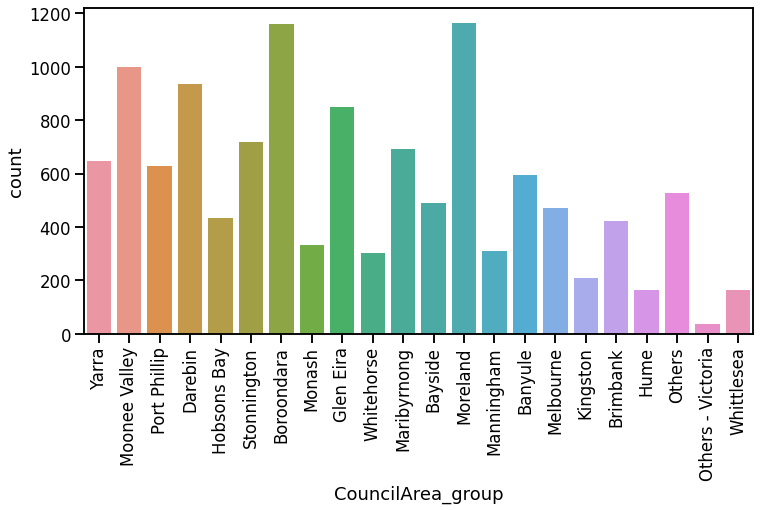

In [160]:
plt.figure(figsize=(12,6))
sns.countplot(data = melb_df, x="CouncilArea_group")
plt.xticks(rotation=90)
plt.show()

Hay que ver si a la hora de cruzar con los datos de Airbnb, estos agrupamientos nos traen problemas. Depende qué columna usemos para unir

#### Propertycount

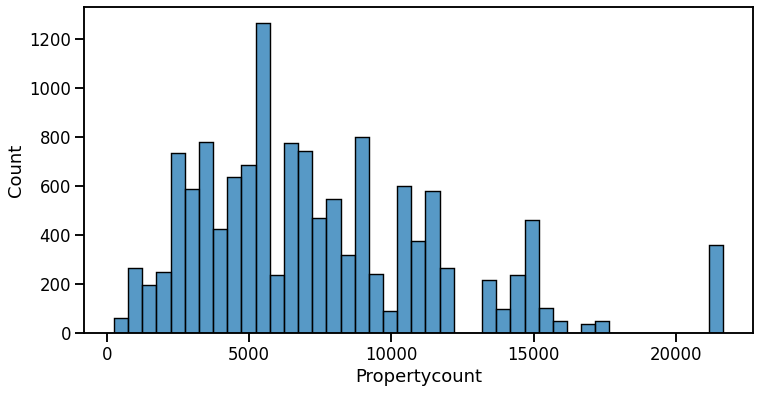

In [161]:
plt.figure(figsize = (12,6))
sns.histplot(melb_df.Propertycount)
plt.show()

Consideramos importante dejarla por la información que brinda, no es lo mismo un suburbio donde hay muchas propiedades en oferta, que aquellos donde hay muy pocas

Analizamos a qué suburbios corresponden esos registros que tienen más de 20000 propiedades

In [162]:
melb_df[melb_df.Propertycount > 20000].CouncilArea.describe()

count         323
unique          1
top       Darebin
freq          323
Name: CouncilArea, dtype: object

Corresponden al mismo distrito, así que los vamos a dejar

#### Bedroom

In [163]:
melb_df[['Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea']].describe()

,Bedroom2,Bathroom,Car,Landsize,BuildingArea
count,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000
mean,2.914728,1.534242,1.610075,558.416127,151.967650
std,0.965921,0.691712,0.962634,3990.669241,541.014538
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,1.000000,177.000000,93.000000
50%,3.000000,1.000000,2.000000,440.000000,126.000000
75%,3.000000,2.000000,2.000000,651.000000,174.000000
max,20.000000,8.000000,10.000000,433014.000000,44515.000000


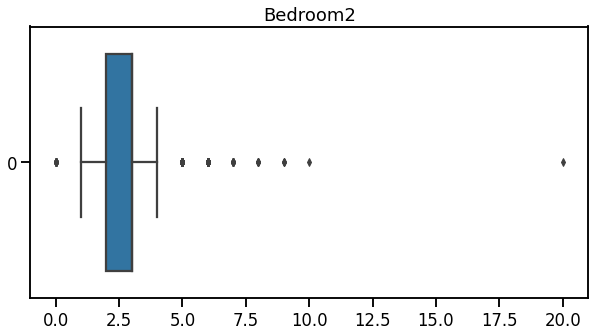

In [164]:
plt.figure(figsize=(10,5))
sns.boxplot(data=melb_df['Bedroom2'], orient='h')
plt.title('Bedroom2')
plt.show()

In [165]:
mayor = melb_df[melb_df['Bedroom2']>4].count()['Bedroom2']
menor = melb_df[melb_df['Bedroom2']<1].count()['Bedroom2']
extremo = melb_df[melb_df['Bedroom2']>10].count()['Bedroom2']
print(f'Valores menores a 1: {menor} \nValores mayores a 4: {mayor} \nValor extremo mayor a 10: {extremo}')

Valores menores a 1: 16 
Valores mayores a 4: 639 
Valor extremo mayor a 10: 1


Al observar la distribución de Bedroom2, Se podria descartar el valor mayor a 10, ya que es un solo valor y esta ampliamente alejado del resto de la distribución.

Otro tema es que quiza conviene ver la relación con Rooms y ver qué variable es más informativa

In [166]:
Bedroom2 = melb_df.Bedroom2
Rooms = melb_df.Rooms
pd.crosstab(Bedroom2,Rooms)

Rooms,1,2,3,4,5,6,7,8,10
Bedroom2,,,,,,,,,
0.0,0,5,8,3,0,0,0,0,0
1.0,663,21,5,2,0,0,0,0,0
2.0,16,3539,162,19,1,0,0,0,0
3.0,2,74,5626,175,18,1,0,0,0
4.0,0,8,73,2473,42,4,0,1,0
5.0,0,1,5,15,531,2,2,0,0
6.0,0,0,0,0,2,59,0,2,0
7.0,0,0,0,0,1,1,8,0,0
8.0,0,0,0,0,1,0,0,4,0


Hay 16 valores de Bedroom = 0, quizá nos conviene considerar solamente Rooms

La fuente de información de Bedroom no es tan confiable como la fuente a partir de la cual se obtuvo Rooms. Siendo que tanto Rooms como Bedroom aportan la misma información , decidimos quedarnos solo con Rooms que es más robusta.

#### Bathroom

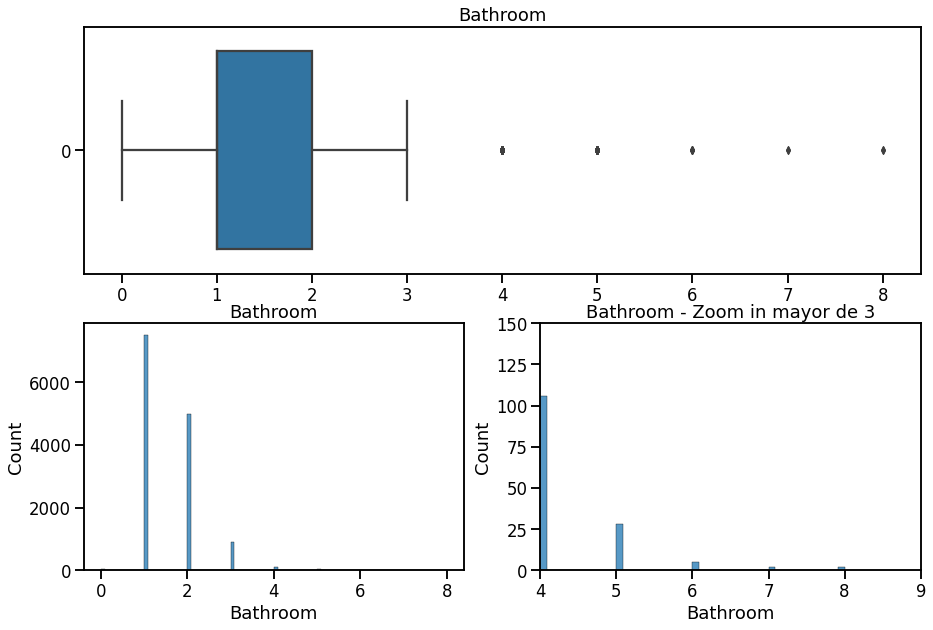

In [167]:
plt.figure(figsize=(15,10))

plt.subplot(2,1,1)
sns.boxplot(data=melb_df['Bathroom'], orient='h')
plt.title('Bathroom')

plt.subplot(2,2,3)
sns.histplot(data=melb_df['Bathroom'])
plt.title('Bathroom')

plt.subplot(2,2,4)
sns.histplot(data=melb_df['Bathroom'])
plt.title('Bathroom - Zoom in mayor de 3')
plt.xlim(4,9)
plt.ylim(0,150)
plt.show()

In [168]:
mayor = melb_df[melb_df['Bathroom']>6].count()['Bathroom']
mayor

4

En este caso se propone dejar todos los valores, Si bien solo son 4, se observa una continuación en la distribucion de dismuyendo progresivamente la cantidad y sin saltos.

In [169]:
bath0 = melb_df[melb_df['Bathroom']==0].count()['Bathroom']
bath0

34

Algo que podemos hacer con los registros que tienen 0 baños, es asumir que por defecto tienen 1 baño

In [170]:
#Lo dejo comentado, para hacerlo sobre una copia del df
#melb_df.loc[melb_df.Bathroom<1,'Bathroom']=1

#### Car

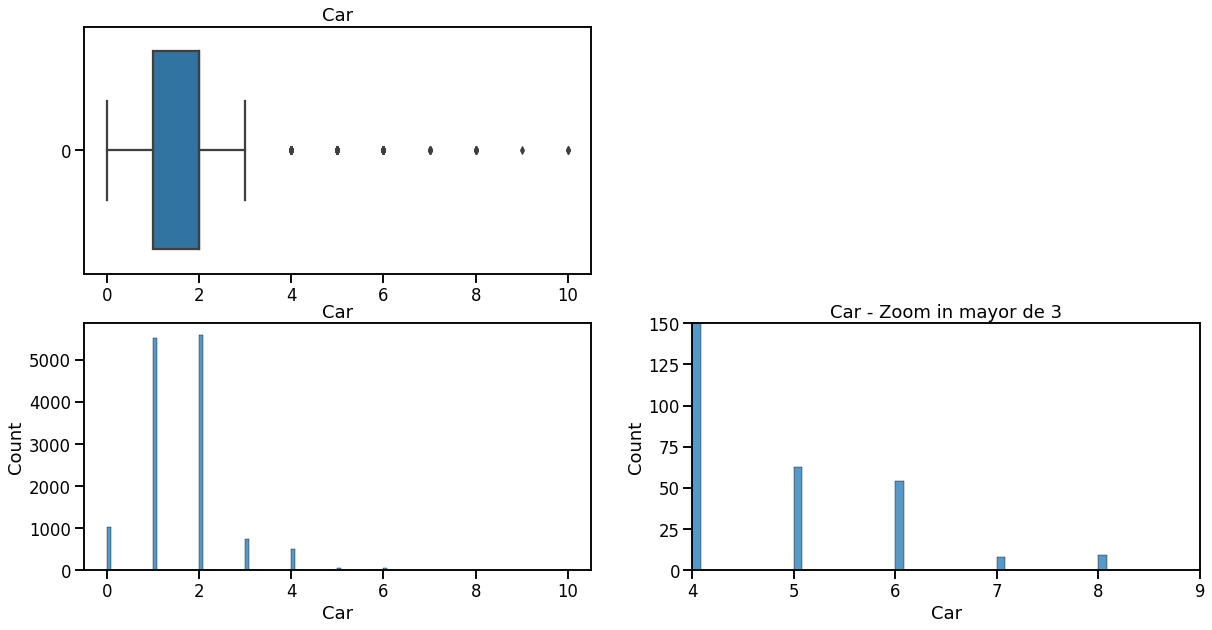

In [171]:
plt.figure(figsize=(20,10))

plt.subplot(2,2,1)
sns.boxplot(data=melb_df['Car'], orient='h')
plt.title('Car')

plt.subplot(2,2,3)
sns.histplot(data=melb_df['Car'])
plt.title('Car')

plt.subplot(2,2,4)
sns.histplot(data=melb_df['Car'])
plt.title('Car - Zoom in mayor de 3')
plt.xlim(4,9)
plt.ylim(0,150)
plt.show()

Idem al análisis hecho para Bedroom

#### Landsize

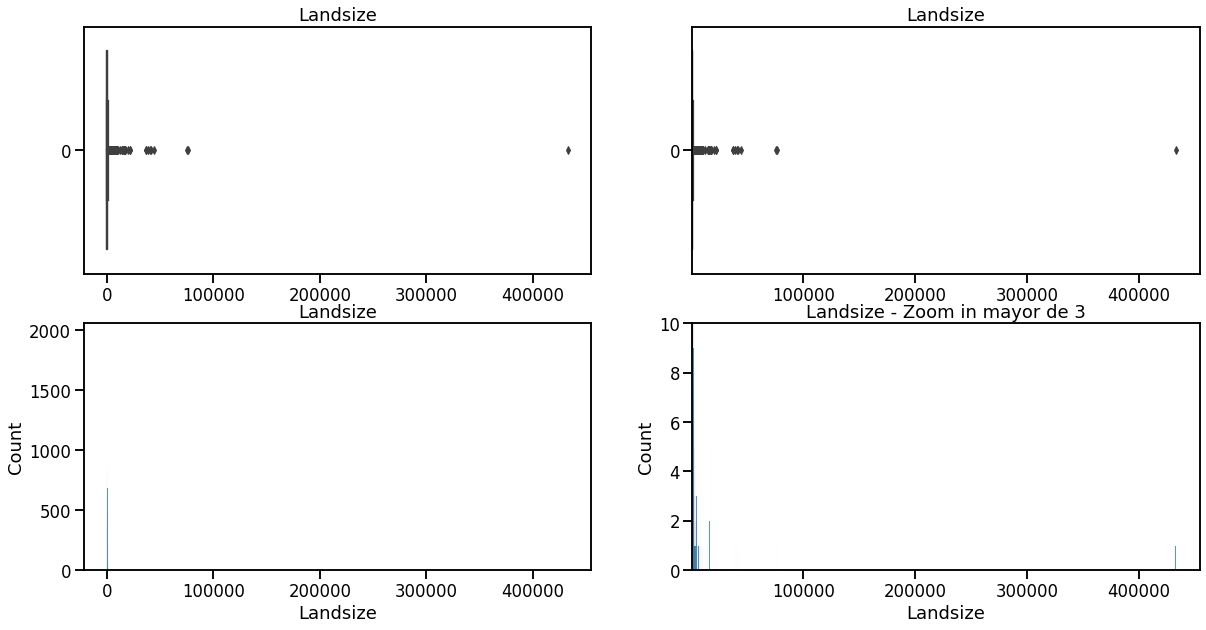

In [172]:
plt.figure(figsize=(20,10))

plt.subplot(2,2,1)
sns.boxplot(data=melb_df['Landsize'], orient='h')
plt.xlim()
plt.title('Landsize')

plt.subplot(2,2,2)
sns.boxplot(data=melb_df['Landsize'], orient='h')
plt.xlim(650,)
plt.title('Landsize')

plt.subplot(2,2,3)
sns.histplot(data=melb_df['Landsize'])
plt.title('Landsize')

plt.subplot(2,2,4)
sns.histplot(data=melb_df['Landsize'])
plt.title('Landsize - Zoom in mayor de 3')
plt.ylim(0,10)
plt.xlim(650,)
plt.show()

In [173]:
p0 = melb_df[(melb_df['Landsize']>=1000) & (melb_df['Landsize']<10000)].count()['Landsize']
p1 = melb_df[(melb_df['Landsize']>=10000) & (melb_df['Landsize']<20000)].count()['Landsize']
p2 = melb_df[(melb_df['Landsize']>=20000) & (melb_df['Landsize']<30000)].count()['Landsize']
p3 = melb_df[(melb_df['Landsize']>=30000) & (melb_df['Landsize']<40000)].count()['Landsize']
p4 = melb_df[(melb_df['Landsize']>=40000)].count()['Landsize']
print(f'Entre 1.000 y 10.000: {p0}')
print(f'Entre 10.000 y 20.000: {p1}')
print(f'Entre 20.000 y 30.000: {p2}')
print(f'Entre 30.000 y 40.000: {p3}')
print(f'Mas 40.000: {p4}')

Entre 1.000 y 10.000: 647
Entre 10.000 y 20.000: 14
Entre 20.000 y 30.000: 3
Entre 30.000 y 40.000: 3
Mas 40.000: 6


Estos valores extremos de mas de 10.000 m2 de Landsize están muy alejados del resto, afectando todos los estadisticos. Se sugiere eliminarlos.

#### BuildingArea

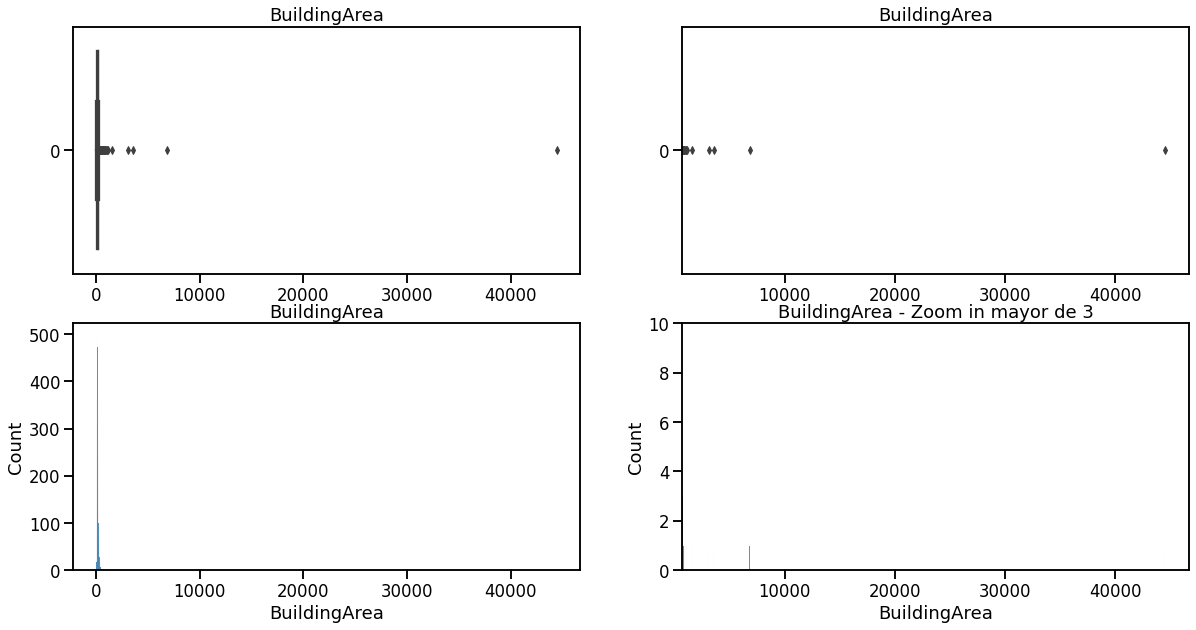

In [174]:
plt.figure(figsize=(20,10))

plt.subplot(2,2,1)
sns.boxplot(data=melb_df['BuildingArea'], orient='h')
plt.xlim()
plt.title('BuildingArea')

plt.subplot(2,2,2)
sns.boxplot(data=melb_df['BuildingArea'], orient='h')
plt.xlim(650,)
plt.title('BuildingArea')

plt.subplot(2,2,3)
sns.histplot(data=melb_df['BuildingArea'])
plt.title('BuildingArea')

plt.subplot(2,2,4)
sns.histplot(data=melb_df['BuildingArea'])
plt.title('BuildingArea - Zoom in mayor de 3')
plt.ylim(0,10)
plt.xlim(650,)
plt.show()

In [175]:
p0 = melb_df[(melb_df['BuildingArea']>=1000) & (melb_df['BuildingArea']<10000)].count()['BuildingArea']
p1 = melb_df[(melb_df['BuildingArea']>=10000) & (melb_df['BuildingArea']<20000)].count()['BuildingArea']
p2 = melb_df[(melb_df['BuildingArea']>=20000) & (melb_df['BuildingArea']<30000)].count()['BuildingArea']
p3 = melb_df[(melb_df['BuildingArea']>=30000) & (melb_df['BuildingArea']<40000)].count()['BuildingArea']
p4 = melb_df[(melb_df['BuildingArea']>=40000)].count()['BuildingArea']
print(f'Entre 1000 y 10.000: {p0}')
print(f'Entre 10.000 y 20.000: {p1}')
print(f'Entre 20.000 y 30.000: {p2}')
print(f'Entre 30.000 y 40.000: {p3}')
print(f'Mas 40.000: {p4}')

Entre 1000 y 10.000: 7
Entre 10.000 y 20.000: 0
Entre 20.000 y 30.000: 0
Entre 30.000 y 40.000: 0
Mas 40.000: 1


In [176]:
cant_nan = melb_df.BuildingArea.isna().sum()
print(f'BuildingArea posee {cant_nan} valores NaN')

BuildingArea posee 6450 valores NaN


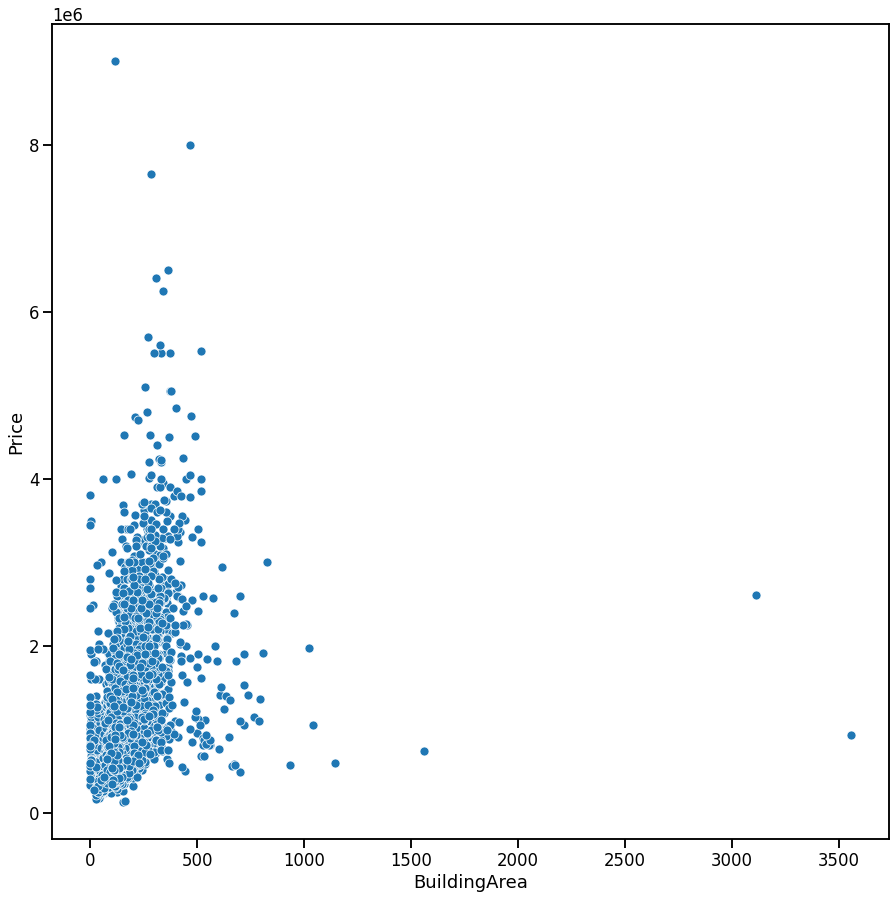

In [177]:
plt.figure(figsize= (15,15))
sns.scatterplot(data=melb_df[melb_df.BuildingArea < 5000], x = 'BuildingArea', y = 'Price')
plt.show()

Estos valores extremos de mas de 1.000 m2 de BuildingArea están muy alejados del resto, afectando todos los estadisticos. Se sugiere ser eliminados.

El Mayor problema que posee BuildingArea esta en la cantidad de valores Nan que posee.

In [178]:
# melb_df2 = melb_df.drop(melb_df[melb_df.BuildingArea > 1000].index)

#### **Method**

In [179]:
# 
melb_df['Method'].unique()

array(['S', 'SP', 'PI', 'VB', 'SA'], dtype=object)

In [180]:
# No presenta valores faltantes
melb_df['Method'].isna().value_counts()

False    13580
Name: Method, dtype: int64

In [181]:
melb_method = melb_df.groupby(by= ['Method']).Price.mean().to_frame()
melb_method

,Price
Method,
PI,1.133242e+06
S,1.087327e+06
SA,1.025772e+06
SP,8.998924e+05
VB,1.166510e+06


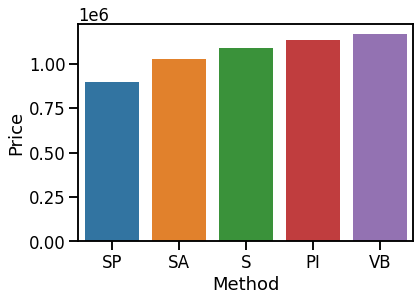

In [182]:
sns.barplot(x = melb_method.index, y= melb_method.Price , order = melb_method.sort_values('Price').index)
plt.show()

No vemos gran variabilidad del precio en función del método de venta

In [183]:
#veamos los precios por type
print(melb_df.groupby("Method")["Price"].mean().round())

Method
PI    1133242.0
S     1087327.0
SA    1025772.0
SP     899892.0
VB    1166510.0
Name: Price, dtype: float64


In [184]:
#veamos los precios por type
print(melb_df.groupby("Method")["Price"].std().round())

Method
PI    731000.0
S     613786.0
SA    547953.0
SP    509988.0
VB    805412.0
Name: Price, dtype: float64


Lo descartamos

#### **Distance**

In [185]:
# Cantidad de elementos nulos. Asumimos que distancia 0 implica que la propiedad esta en el centro de la ciudad
len(melb_df[melb_df['Distance']==0])

6

In [186]:
# Cambiamos nombre de Melbourne con distancia 0 a Melbourne Center para difrerenciar
melb_df.loc[melb_df.Distance == 0.0, 'Suburb'] = 'Melbourne Center'

In [187]:
# Agrupamos las distancias por suburbios
suburbs_distance = melb_df.groupby(by= ['Suburb']).Distance.mean().to_frame()

In [188]:
# Ordenamos de menor a mayor
suburbs_distance = suburbs_distance.sort_values(by = 'Distance')

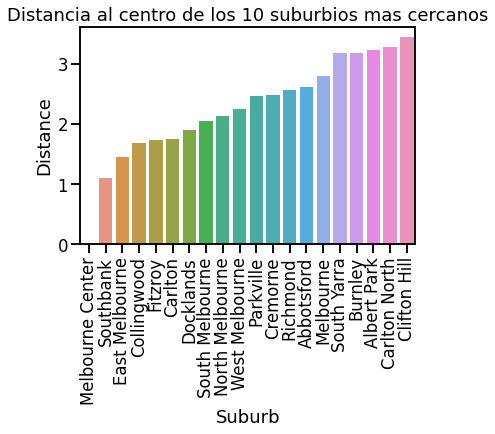

In [189]:
# Se podria eliminar la visualizacion del centro
sns.barplot(x = suburbs_distance.index[0:20], y = suburbs_distance.Distance[0:20])
plt.title('Distancia al centro de los 10 suburbios mas cercanos')
plt.xticks(rotation = 90)
plt.show()

Ploteamos el precio en relación a la distancia

In [190]:
#Definimos algunas funciones que vamos a usar

def to_categorical(column, bin_size=10, min_cut=15, max_cut=65):
    if min_cut is None:
        min_cut = int(round(column.min())) - 1
    value_max = int(np.ceil(column.max()))
    max_cut = min(max_cut, value_max)
    intervals = [(x, x + bin_size) for x in np.arange(min_cut, max_cut, bin_size)]
    if max_cut != value_max:
        intervals.append((max_cut, value_max))
    print(intervals)
    return pd.cut(column, pd.IntervalIndex.from_tuples(intervals))

In [191]:
melb_df['distance_group'] = to_categorical(melb_df.Distance, bin_size = 10, min_cut = 0, max_cut = 50)

[(0, 10), (10, 20), (20, 30), (30, 40), (40, 50)]


<Figure size 1080x1080 with 0 Axes>

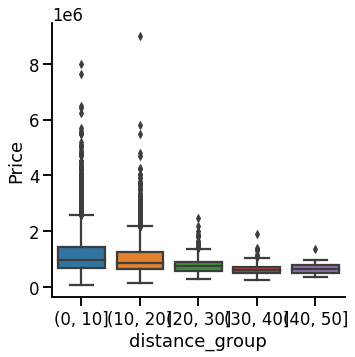

In [192]:
plt.figure(figsize= (15,15))
sns.catplot(data=melb_df, x = 'distance_group', y = 'Price', kind = 'box')
plt.show()

La distancia es una variable importante para considerar su influencia en el precio

#### **Date**

In [193]:
# Convertimos el formato string de fecha a formato date-time pandas
melb_df['Date'] = pd.to_datetime(melb_df.Date)
melb_df['Date_Month'] = pd.to_datetime(melb_df.Date.dt.strftime('%Y - %m'))

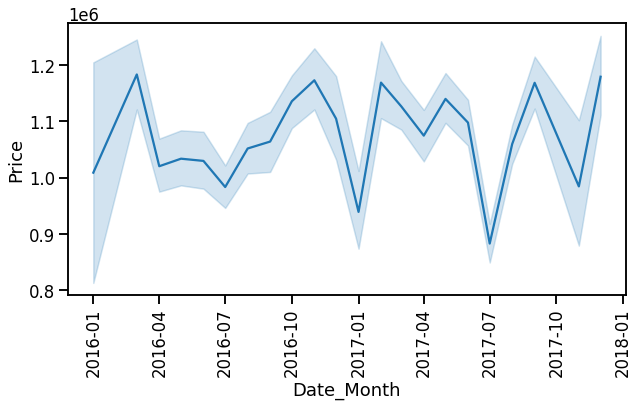

In [194]:
fig = plt.figure(figsize=(10, 5))
sns.lineplot(data = melb_df.sort_values('Date_Month'), x = 'Date_Month', y = 'Price')
plt.xticks(rotation = 90)
plt.show()

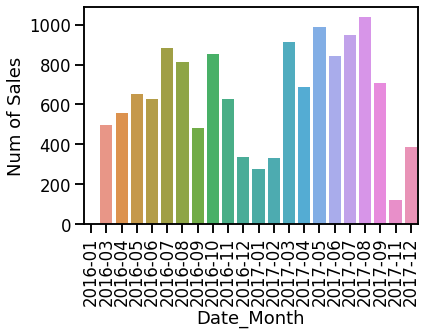

In [195]:
# Cantidad de ventas por año y mes
sales_time = melb_df.groupby(['Date_Month']).Date.count().to_frame()
sales_time = sales_time.rename(columns={'Date' : 'Num of Sales'})
# price_mean = 

sns.barplot(x = sales_time.index.strftime('%Y-%m'), y = sales_time['Num of Sales'])
plt.xticks(rotation = 90)
plt.show()

#### Postcode

In [196]:
melb_df.Postcode.isna().sum()

0

In [197]:
melb_df.groupby('CouncilArea').Postcode.describe()

,count,mean,std,min,25%,50%,75%,max
CouncilArea,,,,,,,,
Banyule,594.0,3083.000000,3.481582,3072.0,3081.00,3083.0,3084.0,3095.0
Bayside,489.0,3187.423313,1.706649,3186.0,3186.00,3187.0,3188.0,3193.0
Boroondara,1160.0,3118.804310,15.042837,3101.0,3103.00,3122.0,3124.0,3147.0
Brimbank,424.0,3023.301887,6.934233,3012.0,3020.00,3020.0,3021.0,3042.0
Cardinia,8.0,3805.375000,9.530965,3782.0,3807.00,3808.5,3810.0,3810.0
Casey,38.0,3753.657895,236.978877,3177.0,3802.25,3805.0,3806.0,3977.0
Darebin,934.0,3072.376874,2.359297,3058.0,3071.00,3072.0,3073.0,3083.0
Frankston,53.0,3310.207547,266.315412,3198.0,3199.00,3199.0,3201.0,3977.0
Glen Eira,848.0,3175.209906,17.672030,3145.0,3163.00,3165.0,3187.0,3204.0


Esta variable no posee datos NaN ni ceros. Está completa. Se utilizará principalemnte para imputar datos faltantes en otras variables de ser necesario

#### SellerG

In [198]:
melb_df.SellerG.unique()

array(['Biggin', 'Nelson', 'Jellis', 'Greg', 'LITTLE', 'Collins', 'Kay',
       'Beller', 'Marshall', 'Brad', 'Maddison', 'Barry', 'Considine',
       'Rendina', 'Propertyau', 'McDonald', 'Prof.', 'Harcourts',
       'hockingstuart', 'Thomson', 'Buxton', 'RT', "Sotheby's", 'Cayzer',
       'Chisholm', 'Brace', 'Miles', 'McGrath', 'Love', 'Barlow',
       'Sweeney', 'Village', 'Jas', 'Gunn&Co', 'Burnham', 'Williams',
       'Compton', 'FN', 'Raine&Horne', 'Hunter', 'Noel', 'Hodges', 'Ray',
       'Gary', 'Fletchers', 'Woodards', 'Raine', 'Walshe', 'Alexkarbon',
       'Weda', 'Frank', 'Stockdale', 'Tim', 'Purplebricks', 'Moonee',
       'HAR', 'Edward', 'Philip', 'RW', 'North', 'Ascend', 'Christopher',
       'Mandy', 'R&H', 'Fletchers/One', 'Assisi', 'One', "O'Brien", 'C21',
       'Bayside', 'Paul', 'First', 'Matthew', 'Anderson', 'Nick',
       'Lindellas', 'Allens', 'Bells', 'Trimson', 'Douglas', 'YPA', 'GL',
       "Tiernan's", 'J', 'Harrington', 'Dingle', 'Chambers', 'Peter',
    

In [199]:
melb_df.SellerG.isna().sum()

0

Analizando los datos presentes en esta variable, vemos que se encuentran nombres de las personas que realizaron las ventas, y tambien agencias que han realizado ventas. Por esta razon la tomamos como una variable a eliminar ya que no aporta datos relevantes para la prediccion de valor de propiedad ni para usar como base para imputar valores faltantes de otras variables

#### YearBuild

In [200]:
melb_df.YearBuilt.describe()

count    8205.000000
mean     1964.684217
std        37.273762
min      1196.000000
25%      1940.000000
50%      1970.000000
75%      1999.000000
max      2018.000000
Name: YearBuilt, dtype: float64

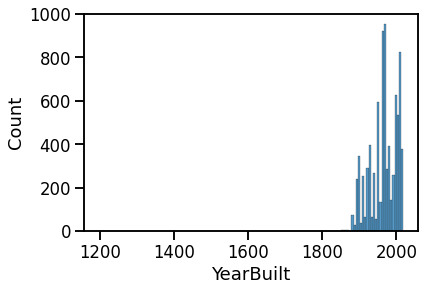

In [201]:
sns.histplot(x = melb_df.YearBuilt)
plt.show()

El mayor problema que tiene YearBuild no esta en la dispersion de su distribucion, si no en la cantidad de valores NaN que posee.

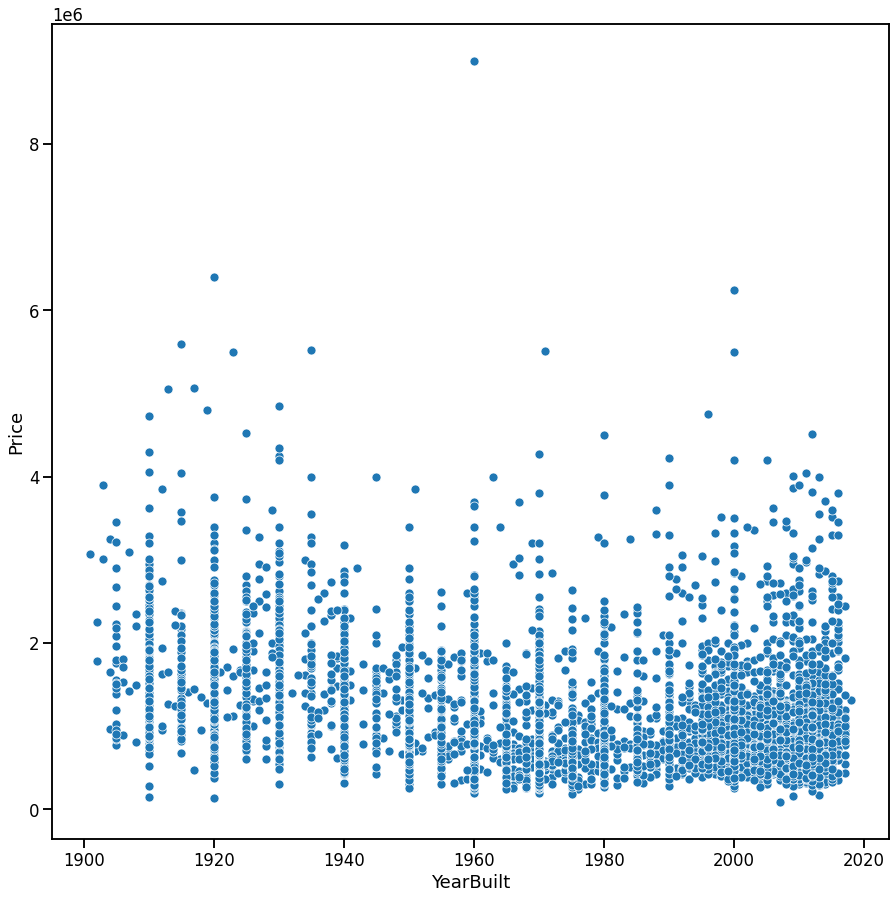

In [202]:
plt.figure(figsize= (15,15))
sns.scatterplot(data=melb_df[melb_df.YearBuilt > 1900], x = 'YearBuilt', y = 'Price')
plt.show()

### Fix de NaN

In [203]:
melb_df.shape

(13580, 26)

In [204]:
melb_df.isna().sum()

Suburb                  0
Address                 0
Rooms                   0
Type                    0
Price                   0
Method                  0
SellerG                 0
Date                    0
Distance                0
Postcode                0
Bedroom2                0
Bathroom                0
Car                    62
Landsize                0
BuildingArea         6450
YearBuilt            5375
CouncilArea          1369
Lattitude               0
Longtitude              0
Regionname              0
Propertycount           0
Regionname_group        0
CouncilArea_group    1338
CouncilArea_count    1369
distance_group          6
Date_Month              0
dtype: int64

Debido a que BuildingArea y YearBuilt tiene practicamente la mitad de valores NaN, se propone eliminar las dos variables, considerando que los errores aparejados de cualquier tipo de imputacion van a terminar afectando la mitad del dataset.

En el caso de la variable Car, se propone sustituirla por el valor más común (2).

Para la variable distance_group, se propone eliminar esas 6 entradas.

### 3: Agregar información adicional respectiva al entorno de una propiedad a partir del conjunto de datos de AirBnB utilizado en el práctico

####1: Seleccionar qué variables agregar y qué combinaciones aplicar a cada una. Por ejemplo, pueden utilizar solo la columna price, o aplicar múltiples transformaciones como la mediana o el mínimo.

In [205]:
# data source:
# https://www.kaggle.com/tylerx/melbourne-airbnb-open-data?select=cleansed_listings_dec18.csv
interesting_cols = [
  'description', 'neighborhood_overview',
  'street', 'neighborhood', 'city', 'suburb', 'state', 'zipcode',
  'price', 'weekly_price', 'monthly_price',
  'latitude', 'longitude',
]
airbnb_df = pd.read_csv(
    'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/cleansed_listings_dec18.csv',
    usecols=interesting_cols)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (35) have mixed types.Specify dtype option on import or set low_memory=False.



In [206]:
airbnb_df[:3]

,description,neighborhood_overview,street,neighborhood,city,suburb,state,zipcode,latitude,longitude,price,weekly_price,monthly_price
0,"House: Clean, New, Modern, Quite, Safe. 10Km f...",Very safe! Family oriented. Older age group.,"Bulleen, VIC, Australia",Balwyn North,Manningham,Bulleen,VIC,3105,-37.772684,145.092133,60,NaN,NaN
1,A large air conditioned room with queen spring...,This hip area is a crossroads between two grea...,"Brunswick East, VIC, Australia",Brunswick,Moreland,Brunswick East,VIC,3057,-37.766505,144.980736,35,200.0,803.0
2,RIGHT IN THE HEART OF ST KILDA! It doesn't get...,A stay at our apartment means you can enjoy so...,"St Kilda, VIC, Australia",St Kilda,Port Phillip,St Kilda,VIC,3182,-37.859755,144.977369,159,1253.0,4452.0


#### 2: Utilizar la variable zipcode para unir los conjuntos de datos. Sólo incluir los zipcodes que tengan una cantidad mínima de registros (a elección) como para que la información agregada sea relevante.

In [207]:
airbnb_df.zipcode.value_counts()

3000.0    2491
3000       876
3006.0     860
3182.0     579
3182       556
          ... 
3428         1
2582.0       1
3803         1
3912         1
3778.0       1
Name: zipcode, Length: 463, dtype: int64

In [208]:
airbnb_df['zipcode'] = pd.to_numeric(airbnb_df.zipcode, errors='coerce')

In [209]:
airbnb_df.zipcode.value_counts()

3000.0    3367
3006.0    1268
3182.0    1135
3141.0     881
3004.0     728
          ... 
2010.0       1
3096.0       1
9004.0       1
3785.0       1
7266.0       1
Name: zipcode, Length: 247, dtype: int64

In [210]:
airbnb_df['zipcode_count'] = airbnb_df.groupby('zipcode')['zipcode'].transform('count')

In [211]:
airbnb_df.zipcode_count.describe()

count    22749.000000
mean       833.910985
std       1113.447670
min          1.000000
25%        113.000000
50%        326.000000
75%       1135.000000
max       3367.000000
Name: zipcode_count, dtype: float64

Antes de unir los conjuntos de datos, tenemos que asegurarnos de que tengamos suficientes registros en común como para agregar información relevantes.

In [212]:
intersection = np.intersect1d(
    airbnb_df.zipcode.values, melb_df.Postcode.values, assume_unique=False)

print("Airbnb unique zipcodes", len(airbnb_df.zipcode.unique()))
print("Sales unique zipcodes", len(melb_df.Postcode.unique()))
print("Common zipcodes", len(intersection))

Airbnb unique zipcodes 248
Sales unique zipcodes 198
Common zipcodes 191


Para terminar de asegurarnos de que las áreas representadas por ambos datasets son consitentes, podemos representar las coordenadas en un mapa usando Plotly.

Aunque estas visualizaciones no son completas en cuanto a la información geográfica que muestran, aproximadamente podemos ver que se tratan de zonas similares.

In [213]:
# import plotly.express as px
# data = melb_df.sample(300)
# fig = px.scatter_geo(
#     data, lat=data.Lattitude, lon=data.Longtitude, color=data.YearBuilt
#     )
# fig.show()

In [214]:
# import plotly.express as px
# color_col = 'city'
# data = airbnb_df[~airbnb_df[color_col].isna()].sample(300)
# fig = px.scatter_geo(
#     data, lat=data.latitude, lon=data.longitude, color=data[color_col]
#     )
# fig.show()

In [215]:
melb_df['pcode_int'] = (melb_df.Postcode)
melb_df.astype({'pcode_int': int})

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Regionname_group,CouncilArea_group,CouncilArea_count,distance_group,Date_Month,pcode_int
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,2016-03-12,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0,Northern Metropolitan,Yarra,647.0,"(0, 10]",2016-03-01,3067
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,2016-04-02,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0,Northern Metropolitan,Yarra,647.0,"(0, 10]",2016-04-01,3067
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,2017-04-03,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0,Northern Metropolitan,Yarra,647.0,"(0, 10]",2017-04-01,3067
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,2017-04-03,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.0,Northern Metropolitan,Yarra,647.0,"(0, 10]",2017-04-01,3067
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,2016-04-06,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0,Northern Metropolitan,Yarra,647.0,"(0, 10]",2016-04-01,3067
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,2017-08-26,16.7,3150.0,4.0,2.0,2.0,652.0,NaN,1981.0,NaN,-37.90562,145.16761,South-Eastern Metropolitan,7392.0,South-Eastern Metropolitan,NaN,NaN,"(10, 20]",2017-08-01,3150
13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,2017-08-26,6.8,3016.0,3.0,2.0,2.0,333.0,133.0,1995.0,NaN,-37.85927,144.87904,Western Metropolitan,6380.0,Western Metropolitan,NaN,NaN,"(0, 10]",2017-08-01,3016
13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,2017-08-26,6.8,3016.0,3.0,2.0,4.0,436.0,NaN,1997.0,NaN,-37.85274,144.88738,Western Metropolitan,6380.0,Western Metropolitan,NaN,NaN,"(0, 10]",2017-08-01,3016
13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,2017-08-26,6.8,3016.0,4.0,1.0,5.0,866.0,157.0,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,6380.0,Western Metropolitan,NaN,NaN,"(0, 10]",2017-08-01,3016


In [216]:
airbnb_df['zcode_int'] = airbnb_df.zipcode
airbnb_df[airbnb_df.zipcode.notna()].astype({'zcode_int': int})

,description,neighborhood_overview,street,neighborhood,city,suburb,state,zipcode,latitude,longitude,price,weekly_price,monthly_price,zipcode_count,zcode_int
0,"House: Clean, New, Modern, Quite, Safe. 10Km f...",Very safe! Family oriented. Older age group.,"Bulleen, VIC, Australia",Balwyn North,Manningham,Bulleen,VIC,3105.0,-37.772684,145.092133,60,NaN,NaN,23.0,3105
1,A large air conditioned room with queen spring...,This hip area is a crossroads between two grea...,"Brunswick East, VIC, Australia",Brunswick,Moreland,Brunswick East,VIC,3057.0,-37.766505,144.980736,35,200.0,803.0,185.0,3057
2,RIGHT IN THE HEART OF ST KILDA! It doesn't get...,A stay at our apartment means you can enjoy so...,"St Kilda, VIC, Australia",St Kilda,Port Phillip,St Kilda,VIC,3182.0,-37.859755,144.977369,159,1253.0,4452.0,1135.0,3182
3,"Comfortable, relaxed house, a home away from ...","This is a great neighbourhood – it is quiet, y...","Thornbury, VIC, Australia",Thornbury,Darebin,Thornbury,VIC,3071.0,-37.758971,144.989228,50,250.0,920.0,114.0,3071
4,We offer comfortable accommodation in Inner Me...,NaN,"St Kilda East, VIC, Australia",St Kilda East,Port Phillip,St Kilda East,VIC,3183.0,-37.864530,144.992238,69,400.0,1900.0,326.0,3183
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22890,"near city, near tram station",NaN,"Carlton, VIC, Australia",Carlton,Melbourne,Carlton,VIC,3053.0,-37.802415,144.962967,55,NaN,NaN,538.0,3053
22891,"Close to: Melton Rail, Coles, Coffee Lounge an...",NaN,"Melton South, VIC, Australia",NaN,Melton,Melton South,VIC,3338.0,-37.705095,144.574474,129,NaN,NaN,25.0,3338
22892,"Hi, 我是一名中国留学生. 由于暑假原因决定出租我的房间. 我会留下我所使用的物品给我的租...",NaN,"Glen Waverley, VIC, Australia",NaN,Monash,Glen Waverley,VIC,3150.0,-37.875252,145.162757,53,NaN,NaN,189.0,3150
22893,Immaculately presented and carefully maintaine...,A plethora of Melbourne highlights are just a ...,"Southbank, VIC, Australia",Southbank,Melbourne,Southbank,VIC,3006.0,-37.827795,144.954987,130,NaN,NaN,1268.0,3006


Hacemos el merge. La variable más completa (menos Nan) parece ser Price

In [217]:
missing_values_count = airbnb_df['price'].isna().sum()
missing_values_count

0

In [218]:
missing_values_count = airbnb_df['weekly_price'].isna().sum()
missing_values_count

20371

In [219]:
missing_values_count = airbnb_df['monthly_price'].isna().sum()
missing_values_count

21004

In [220]:
relevant_cols = ['price']

In [221]:
#Calculamos la media de price por zipcode en el dataset de Airbnb

airbnb_price_by_zipcode=airbnb_df[relevant_cols + ['zcode_int']]\
  .groupby('zcode_int').mean().reset_index()

In [222]:
airbnb_price_by_zipcode = airbnb_price_by_zipcode.rename(columns={'price': 'airbnb_price_mean'})

In [223]:
airbnb_price_by_zipcode.zcode_int.value_counts()

7266.0    1
3789.0    1
3169.0    1
3207.0    1
3109.0    1
         ..
7367.0    1
3070.0    1
3761.0    1
3178.0    1
2010.0    1
Name: zcode_int, Length: 247, dtype: int64

In [224]:
melb_df.pcode_int.value_counts()

3073.0    359
3020.0    306
3121.0    292
3040.0    290
3046.0    284
         ... 
3775.0      1
3765.0      1
3115.0      1
3431.0      1
3756.0      1
Name: pcode_int, Length: 198, dtype: int64

In [225]:
#Ver esto, por algún motivo se me une todo con Nan
merged_sales_df = melb_df.merge(
    airbnb_price_by_zipcode, how='left',
    left_on='pcode_int', right_on='zcode_int')

merged_sales_df.sample(5)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Regionname_group,CouncilArea_group,CouncilArea_count,distance_group,Date_Month,pcode_int,zcode_int,airbnb_price_mean
10633,Croydon,434 Dorset Rd,3,h,725000.0,S,Stockdale,2017-08-07,23.0,3136.0,3.0,1.0,2.0,802.0,105.0,1980.0,Maroondah,-37.81083,145.28792,Eastern Metropolitan,11925.0,Eastern Metropolitan,Others,80.0,"(20, 30]",2017-08-01,3136.0,3136.0,84.807692
13115,Blackburn North,101 Shafer Rd,4,h,1475000.0,PI,Fletchers,2017-09-23,13.4,3130.0,4.0,2.0,2.0,582.0,240.0,2011.0,NaN,-37.80505,145.14919,Eastern Metropolitan,2867.0,Eastern Metropolitan,NaN,NaN,"(10, 20]",2017-09-01,3130.0,3130.0,102.576271
5520,Seddon,6 Staff St,4,h,920000.0,PI,Biggin,2016-05-28,6.6,3011.0,2.0,1.0,0.0,274.0,NaN,NaN,Maribyrnong,-37.80390,144.89290,Western Metropolitan,2417.0,Western Metropolitan,Maribyrnong,692.0,"(0, 10]",2016-05-01,3011.0,3011.0,95.601010
6656,Yarraville,50 Tongue St,4,h,1870000.0,S,Sweeney,2016-08-10,7.0,3013.0,4.0,1.0,3.0,766.0,167.0,1968.0,Maribyrnong,-37.81260,144.89050,Western Metropolitan,6543.0,Western Metropolitan,Maribyrnong,692.0,"(0, 10]",2016-08-01,3013.0,3013.0,135.609756
13430,Frankston South,23 Fenton Cr,4,h,980000.0,S,hockingstuart,2017-08-26,38.0,3199.0,4.0,2.0,2.0,937.0,191.0,1960.0,NaN,-38.15845,145.11141,South-Eastern Metropolitan,7566.0,South-Eastern Metropolitan,NaN,NaN,"(30, 40]",2017-08-01,3199.0,3199.0,174.961165


In [226]:
missing_values_count = merged_sales_df['airbnb_price_mean'].isna().sum()
missing_values_count

20

#### 3: Investigar al menos otras 2 variables que puedan servir para combinar los datos, y justificar si serían adecuadas o no

Una columna posible sería Suburb (melb_df) contra neighborhood(airbnb_df)

In [227]:
print("Airbnb unique Suburbs", len(airbnb_df.suburb.unique()))
print("Sales unique Suburbs", len(melb_df.Suburb.unique()))

Airbnb unique Suburbs 543
Sales unique Suburbs 315


In [228]:
#Cheqear si esto está bien
int_suburb = np.in1d(melb_df.Suburb,airbnb_df.suburb)
sum(int_suburb)

13450

Hay 13456 registros en la base de datos de ventas que tienen al menos una correspondencia con algún registro en la base de Airbnb

Otras columnas que se podrían usar serían Latitud y Longitud, tomándolas siempre como tuplas, y estableciendo algún margen o tolerancia de búsqueda. Lo vemos con unos scatterplot simples, sin profundizar en cómo se implementaría.

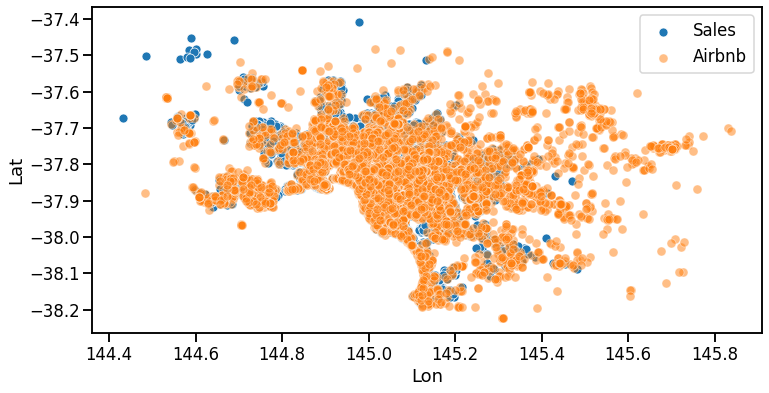

In [229]:
plt.figure(figsize=(12,6))
sns.scatterplot(data= melb_df, x=melb_df.Longtitude, y = melb_df.Lattitude, label = 'Sales')
sns.scatterplot(data= airbnb_df, x=airbnb_df.longitude, y = airbnb_df.latitude, label = 'Airbnb',alpha = 0.5)
plt.xlabel("Lon")
plt.ylabel("Lat")
plt.legend()
plt.show()

## Ejercicio 2: Imputación

1. Imputar los valores faltantes de la columna CouncilArea en base a la información presente en Suburb. (Si en el punto anterior no seleccionó ninguna de estas variables, agréguelas ahora el conjunto de datos).

2. Imputar los valores faltantes de la(s) columna(s) que se agregaron a partir del conjunto de datos de AirBnB.



#### Imputar los valores faltantes de la columna CouncilArea en base a la información presente en Suburb.

In [230]:
print("Sales unique Suburbs", len(merged_sales_df.Suburb.unique()))
print("Sales unique Councils", len(merged_sales_df.CouncilArea.unique()))

Sales unique Suburbs 315
Sales unique Councils 34


Obtener una lista única de suburbios con el Council que le corresponde (lo hacemos desde el dataset original)

In [231]:
suburb_council = melb_df.groupby(['Suburb','CouncilArea']).count().reset_index()[['Suburb','CouncilArea','Propertycount']]
suburb_council = suburb_council.rename(columns={'Propertycount':'count'})

suburb_council


,Suburb,CouncilArea,count
0,Abbotsford,Yarra,55
1,Aberfeldie,Moonee Valley,40
2,Airport West,Moonee Valley,61
3,Albanvale,Brimbank,4
4,Albert Park,Port Phillip,64
...,...,...,...
334,Wonga Park,Manningham,1
335,Wyndham Vale,Wyndham,3
336,Yallambie,Banyule,23
337,Yarra Glen,Yarra Ranges,1


Aparentemente, cada suburbio puede estar cruzado por más de un Council o LGA: https://en.wikipedia.org/wiki/Bundoora,_Victoria

Para esos casos, nos vamos a quedar con el CouncilArea más frecuente de cada suburbio. Lo idea sería contar con información externa como un GeoDataFrame que nos permita saber a qué CouncilArea depende cada registro, pero con la información disponible esta nos parece la mejor solución

Generamos un nuevo df donde solo nos quedamos con el más frecuente

In [232]:
lista_s = suburb_council.Suburb.unique()
df_sub = pd.DataFrame(columns = suburb_council.columns)

for s in lista_s:
  a = suburb_council[suburb_council.Suburb == s]
  a = a[a['count']==a['count'].max()]
  df_sub = df_sub.append(a,ignore_index=True)
  



In [233]:
df_sub = df_sub.drop(['count'], axis = 'columns')

In [234]:
df_sub = df_sub.rename(columns={'Suburb': 'Sub', 'CouncilArea': 'Coun'})

In [235]:
df_sub

,Sub,Coun
0,Abbotsford,Yarra
1,Aberfeldie,Moonee Valley
2,Airport West,Moonee Valley
3,Albanvale,Brimbank
4,Albert Park,Port Phillip
...,...,...
304,Wonga Park,Manningham
305,Wyndham Vale,Wyndham
306,Yallambie,Banyule
307,Yarra Glen,Yarra Ranges


Hacemos el merge contra merged_sales_df, que ya tiene los datos incorporados de Airbnb

In [236]:
merged_sales_suburb = merged_sales_df.merge(
    df_sub, how='left',
    left_on='Suburb', right_on='Sub')

Rellenamos los NaN con la nueva columna

In [237]:
merged_sales_suburb.CouncilArea.fillna(merged_sales_suburb.Coun, inplace = True)

In [238]:
missing_values_count = merged_sales_suburb['CouncilArea'].isna().sum()
missing_values_count

7

Nos quedan ahora solo 7 filas con Nan en CouncilArea

In [239]:
merged_sales_suburb[merged_sales_suburb['CouncilArea'].isna()]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Regionname_group,CouncilArea_group,CouncilArea_count,distance_group,Date_Month,pcode_int,zcode_int,airbnb_price_mean,Sub,Coun
12251,Burnside,22 Paringa Wy,3,h,657500.0,SP,Harcourts,2017-03-09,14.8,3023.0,3.0,2.0,2.0,631.0,NaN,NaN,NaN,-37.75225,144.75520,Western Metropolitan,1607.0,Western Metropolitan,NaN,NaN,"(10, 20]",2017-03-01,3023.0,3023.0,92.600000,NaN,NaN
12438,Attwood,2 Herod Pl,3,h,640000.0,SP,YPA,2017-09-09,16.5,3049.0,3.0,2.0,2.0,607.0,NaN,NaN,NaN,-37.67379,144.89826,Northern Metropolitan,1130.0,Northern Metropolitan,NaN,NaN,"(10, 20]",2017-09-01,3049.0,3049.0,92.285714,NaN,NaN
12865,Wallan,14 Danaher Av,3,h,366000.0,S,Ray,2017-09-16,44.2,3756.0,3.0,1.0,1.0,502.0,77.0,1978.0,NaN,-37.40853,144.97749,Northern Victoria,3988.0,Victoria,Others - Victoria,NaN,"(40, 50]",2017-09-01,3756.0,NaN,NaN,NaN,NaN
13245,New Gisborne,71 Hamilton Rd,5,h,1355000.0,S,Raine,2017-09-23,48.1,3438.0,5.0,3.0,5.0,44500.0,44515.0,NaN,NaN,-37.45392,144.58864,Northern Victoria,849.0,Victoria,Others - Victoria,NaN,"(40, 50]",2017-09-01,3438.0,NaN,NaN,NaN,NaN
13264,Plumpton,9 Remy Av,4,h,625500.0,SP,HAR,2017-09-23,23.8,3335.0,4.0,2.0,2.0,477.0,178.0,2012.0,NaN,-37.71429,144.72492,Western Metropolitan,1490.0,Western Metropolitan,NaN,NaN,"(20, 30]",2017-09-01,3335.0,3335.0,137.333333,NaN,NaN
13381,Burnside,18 Fydler Av,3,h,580000.0,S,YPA,2017-08-26,14.8,3023.0,3.0,2.0,2.0,461.0,174.0,2000.0,NaN,-37.74518,144.74708,Western Metropolitan,1607.0,Western Metropolitan,NaN,NaN,"(10, 20]",2017-08-01,3023.0,3023.0,92.600000,NaN,NaN
13494,Monbulk,21 David St,4,h,720000.0,SP,Fletchers,2017-08-26,34.1,3793.0,4.0,2.0,2.0,1611.0,NaN,NaN,NaN,-37.87931,145.41288,Eastern Victoria,1424.0,Victoria,Others - Victoria,NaN,"(30, 40]",2017-08-01,3793.0,3793.0,126.875000,NaN,NaN


Lo que parece suceder con esos 7 casos, es que hay un solo registro para el Suburbio que le corresponde, y ese tiene NaN, entonces no hay manera de encontrar la información

In [240]:
merged_sales_df[melb_df.Suburb== 'Plumpton']

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Regionname_group,CouncilArea_group,CouncilArea_count,distance_group,Date_Month,pcode_int,zcode_int,airbnb_price_mean
13264,Plumpton,9 Remy Av,4,h,625500.0,SP,HAR,2017-09-23,23.8,3335.0,4.0,2.0,2.0,477.0,178.0,2012.0,NaN,-37.71429,144.72492,Western Metropolitan,1490.0,Western Metropolitan,NaN,NaN,"(20, 30]",2017-09-01,3335.0,3335.0,137.333333


A estos 7 los podemos borrar

#### 2. Imputar los valores faltantes de la(s) columna(s) que se agregaron a partir del conjunto de datos de AirBnB.

In [241]:
missing_values_count = merged_sales_suburb['airbnb_price_mean'].isna().sum()
missing_values_count

20

Tenemos 20 valores con NaN. Son muy pocos. Podríamos imputarlos de manera similar agrupando por CouncilArea, pero quizá no vale la pena y mejor probar una imputación más simple.

In [242]:
from sklearn.impute import SimpleImputer
median_imputer = SimpleImputer(strategy='median')

In [243]:
mediana = merged_sales_suburb['airbnb_price_mean'].median()

In [244]:
merged_sales_suburb.airbnb_price_mean.fillna(mediana, inplace = True)

Comprobamos que nada haya quedado con NaN

In [245]:
missing_values_count = merged_sales_suburb['airbnb_price_mean'].isna().sum()
missing_values_count

0

## Ejercicio 3

Crear y guardar un nuevo conjunto de datos con todas las transformaciones realizadas anteriormente.

Vamos a tomar nuestro ultimo dataframe (merged_sales_suburb) y lo vamos a dejar listo para trabajar en el siguiente entregable

In [246]:
merged_sales_suburb.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount', 'Regionname_group',
       'CouncilArea_group', 'CouncilArea_count', 'distance_group',
       'Date_Month', 'pcode_int', 'zcode_int', 'airbnb_price_mean', 'Sub',
       'Coun'],
      dtype='object')

Primero borramos las columnas auxiliares que fuimos generando

In [247]:
melb_df_clean = merged_sales_suburb.drop(['Regionname_group','CouncilArea_group','CouncilArea_group','pcode_int','zcode_int','Sub', 'Coun','CouncilArea_count'],axis=1)

In [248]:
melb_df_clean.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount', 'distance_group',
       'Date_Month', 'airbnb_price_mean'],
      dtype='object')

Ahora borramos las que decidimos descartar en el ejercicio 1

In [249]:
melb_df_clean = melb_df_clean.drop(['Bedroom2','Address','Method','SellerG','Regionname'],axis = 1)

In [250]:
melb_df_clean.columns

Index(['Suburb', 'Rooms', 'Type', 'Price', 'Date', 'Distance', 'Postcode',
       'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt',
       'CouncilArea', 'Lattitude', 'Longtitude', 'Propertycount',
       'distance_group', 'Date_Month', 'airbnb_price_mean'],
      dtype='object')

In [251]:
melb_df_clean.isna().sum()

Suburb                  0
Rooms                   0
Type                    0
Price                   0
Date                    0
Distance                0
Postcode                0
Bathroom                0
Car                    62
Landsize                0
BuildingArea         6450
YearBuilt            5375
CouncilArea             7
Lattitude               0
Longtitude              0
Propertycount           0
distance_group          6
Date_Month              0
airbnb_price_mean       0
dtype: int64

In [252]:
#Eliminamos las 7 filas de CouncilArea que no pudimos imputar

melb_df_clean.drop(melb_df_clean[melb_df_clean.CouncilArea.isna()].index, inplace = True)


In [253]:
#Completamos los datos faltantes de Car con el valor más común (2)
melb_df_clean.Car.fillna(2, inplace = True)

Ahora eliminamos los valores extremos o outliers

In [254]:
#Registros con 0 baños, asumimos que tienen 1 baño:

melb_df_clean.loc[melb_df_clean.Bathroom<1,'Bathroom']=1

#Eliminamos valores extremos de Landsize y Building Area
melb_df_clean = melb_df_clean.drop(melb_df_clean[melb_df_clean['Landsize'] > 10000].index)
melb_df_clean = melb_df_clean.drop(melb_df_clean[melb_df_clean['BuildingArea'] > 1000].index).reset_index()

#Eliminamos columna Date, solo dejamos date_month
melb_df_clean = melb_df_clean.drop(['Date'], axis =1)

Eliminamos la variable distance_group

In [255]:
melb_df = melb_df.drop(['distance_group'],axis = 1)

Ahora guardamos el conjunto a un nuevo CSV

In [256]:
melb_df_clean.to_csv('melb_df_clean.csv')